In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airline.dropna(axis=0,inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

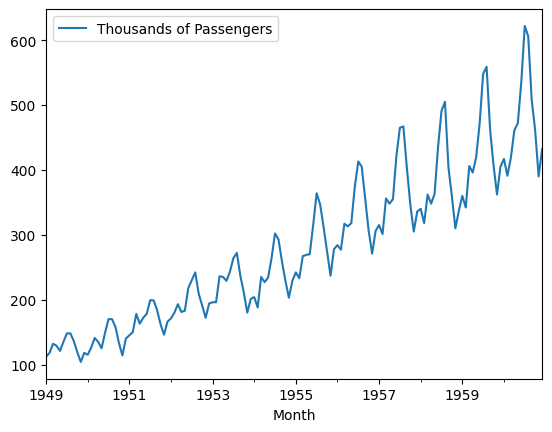

In [13]:
df_airline.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [18]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [21]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [22]:
### 12 months
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [23]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

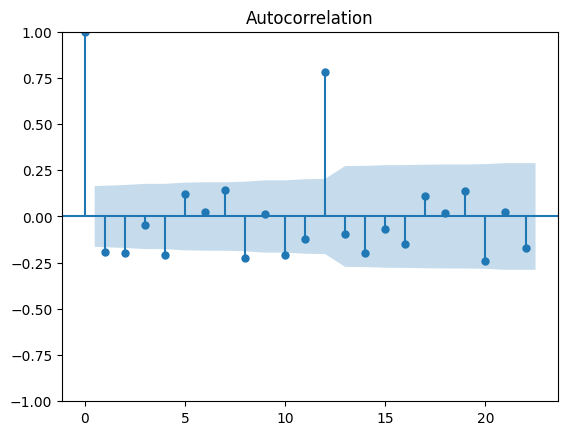

In [25]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

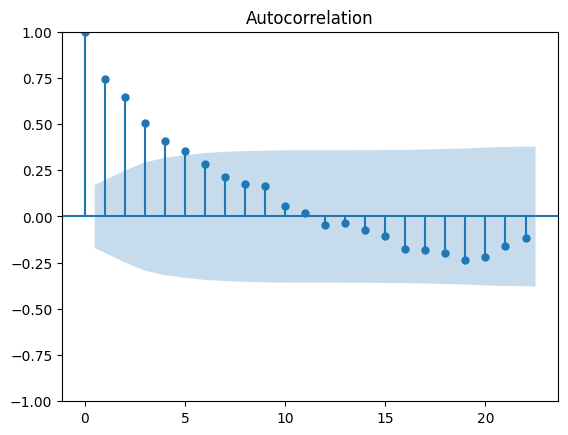

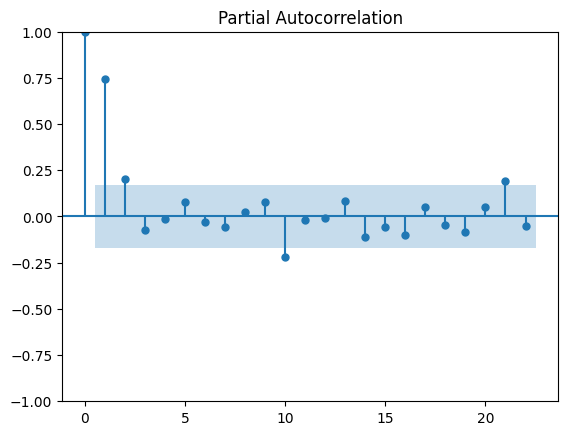

In [26]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

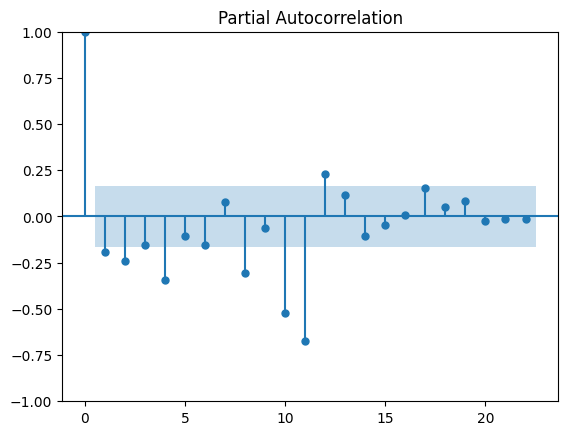

In [27]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

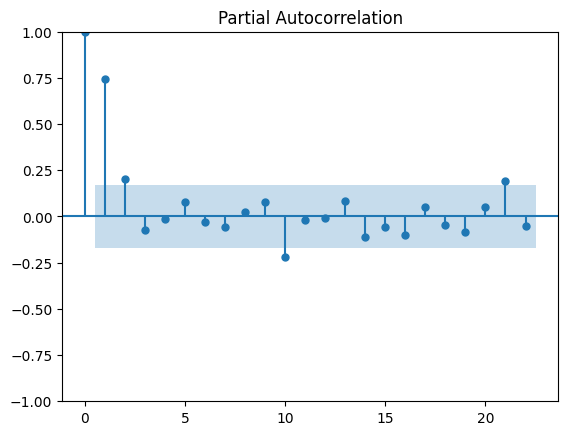

In [28]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [29]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [30]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [31]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [32]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [33]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [34]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [35]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [56]:
from statsmodels.tsa.arima.model import ARIMA  # Use the correct path


In [81]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(11,2,0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [82]:
model_Arima_fit=model_ARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [83]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(11, 2, 0)   Log Likelihood                -312.914
Date:                     Wed, 24 Jan 2024   AIC                            649.828
Time:                             20:35:04   BIC                            678.709
Sample:                         01-01-1949   HQIC                           661.423
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9287      0.073    -12.651      0.000      -1.073      -0.785
ar.L2         -0.9649      0.064    -15.117      0.000      -1.090      -0.840
ar.L3         -0.9540      0.075    -12.750      0.000      -1.101      -0.807
ar.L4         -0.9612      0.071    -13.563      0.000      -1.100      -0.822
ar.L5         -0.9268      0.089    -10.460      0.000      -1.100      -0.753
ar.L6         -0.9205      0.086    -10.656      0.000      -1.090      -0.751
ar.L7         -0.8901      0.095     -9.415      0.000      -1.075      -0.705
ar.L8         -0.9873      0.085    -11.648      0.000      -1.153      -0.821
ar.L9         -0.8940      0.082    -10.864      0.000      -1.055      -0.733
ar.L10        -0.9385      0.065    -14.503      0.000      -1.065      -0.812
ar.L11        -0.8371      0.072    -11.704      0.000      -0.977      -0.697
sigma2        96.6783     16.895      5.722      0.000      63.565     129.792
===================================================================================
Ljung-Box (L1) (Q):                   4.04   Jarque-Bera (JB):                 3.31
Prob(Q):                              0.04   Prob(JB):                         0.19
Heteroskedasticity (H):               1.91   Skew:                             0.48
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_SARIMA,Predicted_ARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,NaN,319.0
1956-02-01,277.0,-7.0,-13.0,44.0,NaN,360.0
1956-03-01,317.0,40.0,47.0,50.0,NaN,401.0
1956-04-01,313.0,-4.0,-44.0,44.0,NaN,442.0
1956-05-01,318.0,5.0,9.0,48.0,NaN,483.0
1956-06-01,374.0,56.0,51.0,59.0,NaN,524.0
1956-07-01,413.0,39.0,-17.0,49.0,403.397562,565.0
1956-08-01,405.0,-8.0,-47.0,58.0,385.070585,606.0
1956-09-01,355.0,-50.0,-42.0,43.0,349.445081,647.0


In [85]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [86]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [87]:
pred

1956-01-01    291.739026
1956-02-01    282.828566
1956-03-01    308.415783
1956-04-01    313.844795
1956-05-01    318.174094
1956-06-01    362.051397
1956-07-01    406.825987
1956-08-01    386.153533
1956-09-01    354.563499
1956-10-01    318.957152
1956-11-01    287.972606
1956-12-01    326.772265
1957-01-01    340.949232
1957-02-01    331.653061
1957-03-01    350.585640
1957-04-01    359.120661
1957-05-01    366.126157
1957-06-01    409.077351
1957-07-01    449.270610
1957-08-01    426.034004
1957-09-01    397.033165
1957-10-01    364.359942
1957-11-01    338.979234
1957-12-01    375.333427
1958-01-01    389.654346
1958-02-01    379.634635
1958-03-01    393.467457
1958-04-01    404.708145
1958-05-01    413.981124
1958-06-01    455.936858
1958-07-01    491.463466
1958-08-01    466.506040
1958-09-01    439.537072
1958-10-01    410.183198
1958-11-01    389.907593
1958-12-01    423.702963
1959-01-01    437.865282
1959-02-01    426.941122
1959-03-01    436.990979
1959-04-01    450.540201


In [88]:
residuals

Month
1956-01-01     -7.739026
1956-02-01     -5.828566
1956-03-01      8.584217
1956-04-01     -0.844795
1956-05-01     -0.174094
1956-06-01     11.948603
1956-07-01      6.174013
1956-08-01     18.846467
1956-09-01      0.436501
1956-10-01    -12.957152
1956-11-01    -16.972606
1956-12-01    -20.772265
1957-01-01    -25.949232
1957-02-01    -30.653061
1957-03-01      5.414360
1957-04-01    -11.120661
1957-05-01    -11.126157
1957-06-01     12.922649
1957-07-01     15.729390
1957-08-01     40.965996
1957-09-01      6.966835
1957-10-01    -17.359942
1957-11-01    -33.979234
1957-12-01    -39.333427
1958-01-01    -49.654346
1958-02-01    -61.634635
1958-03-01    -31.467457
1958-04-01    -56.708145
1958-05-01    -50.981124
1958-06-01    -20.936858
1958-07-01     -0.463466
1958-08-01     38.493960
1958-09-01    -35.537072
1958-10-01    -51.183198
1958-11-01    -79.907593
1958-12-01    -86.702963
1959-01-01    -77.865282
1959-02-01    -84.941122
1959-03-01    -30.990979
1959-04-01    -54.5

<Axes: ylabel='Density'>

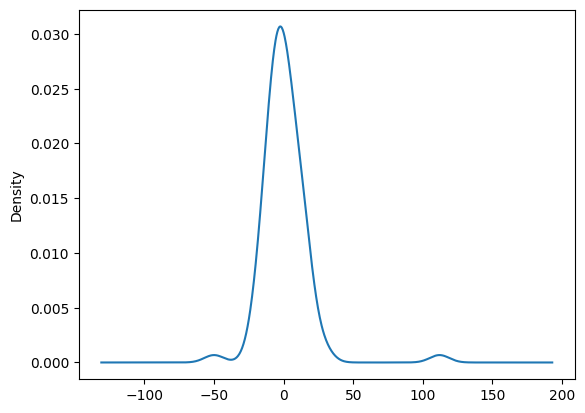

In [89]:
model_Arima_fit.resid.plot(kind='kde')

In [90]:
test_data['Predicted_ARIMA']=pred

<ipython-input-90-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

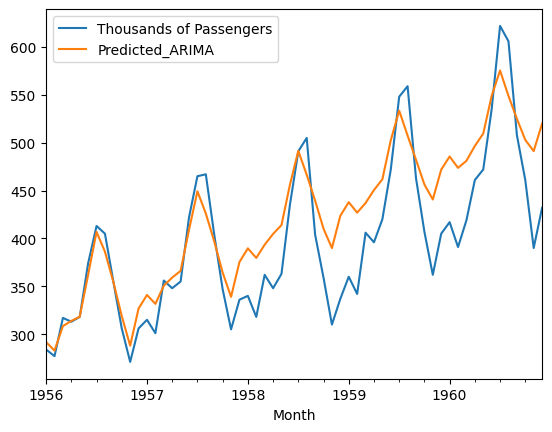

In [91]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

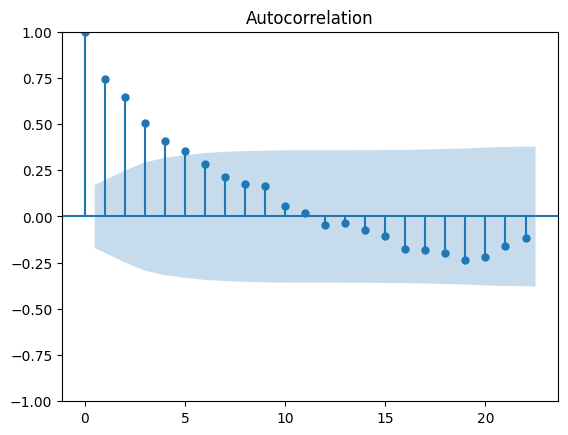

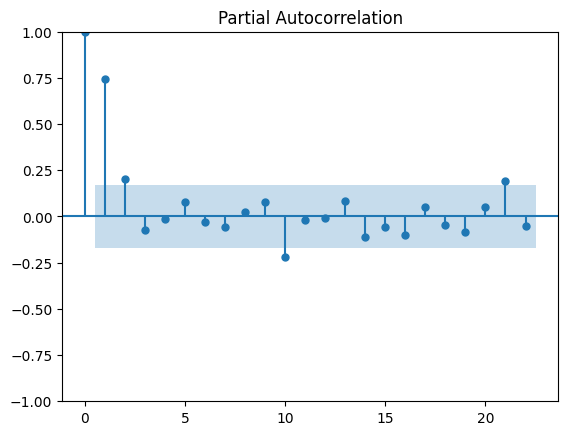

In [92]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [93]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [94]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [95]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [96]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Wed, 24 Jan 2024   AIC                            548.481
Time:                                     20:35:34   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5981      0.938      0.638      0.524      -1.239       2.436
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.163      0.158      0.874      -2.095       2.463
ma.L2         -0.5340      1.260     -0.424      0.672      -3.004       1.936
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.653
ma.L4         -0.1273      0.337     -0.378      0.705      -0.787       0.533
ma.L5          0.2471      0.356      0.694      0.488      -0.451       0.945
sigma2        87.7331     80.954      1.084      0.278     -70.934     246.400
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_SARIMA,Predicted_ARIMA
Month,,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,460.265477,548.843537
1960-09-01,508.0,-98.0,-82.0,45.0,422.853351,525.028031
1960-10-01,461.0,-47.0,51.0,54.0,381.666163,502.935088
1960-11-01,390.0,-71.0,-24.0,28.0,342.297537,491.225211
1960-12-01,432.0,42.0,113.0,27.0,380.322941,519.904984


In [98]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [99]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

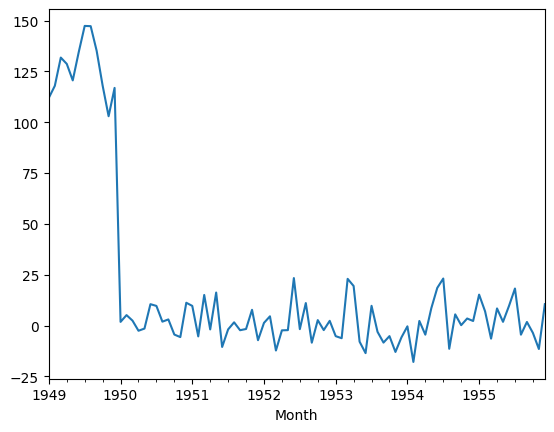

In [100]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

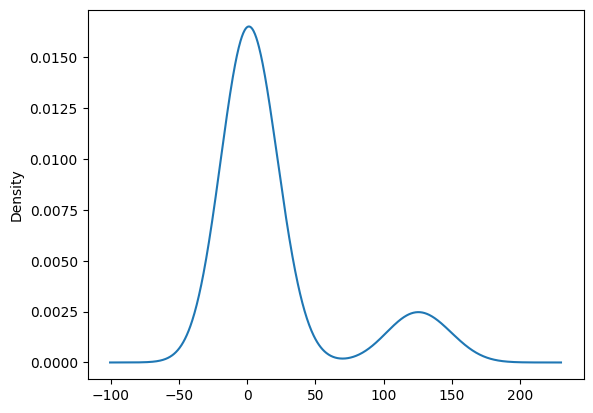

In [101]:
model_SARIMA_fit.resid.plot(kind='kde')

In [102]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-102-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [103]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_SARIMA,Predicted_ARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,NaN,291.739026
1956-02-01,277.0,-7.0,-13.0,44.0,NaN,282.828566
1956-03-01,317.0,40.0,47.0,50.0,NaN,308.415783
1956-04-01,313.0,-4.0,-44.0,44.0,NaN,313.844795
1956-05-01,318.0,5.0,9.0,48.0,NaN,318.174094
1956-06-01,374.0,56.0,51.0,59.0,NaN,362.051397
1956-07-01,413.0,39.0,-17.0,49.0,403.397562,406.825987
1956-08-01,405.0,-8.0,-47.0,58.0,385.070585,386.153533
1956-09-01,355.0,-50.0,-42.0,43.0,349.445081,354.563499


<Axes: xlabel='Month'>

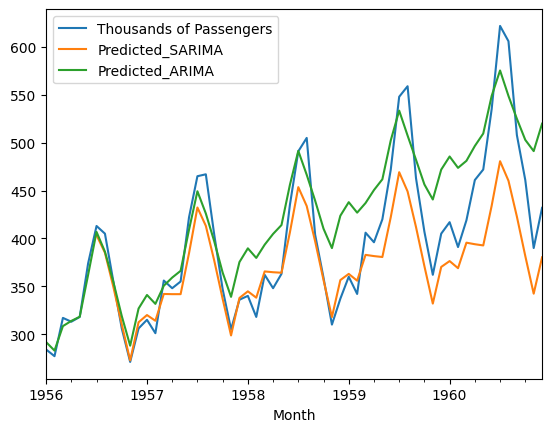

In [104]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()